# Data Preprocessing Akram 19066171

## Voorspelling van huisprijzen

In deze analyse zal ik de huisprijzen gaan voorspellen aan de hand van een gegeven dataset genaamd 'House data'. Deze dataset is afkomstig uit Kaggle.com. In deze dataset zijn er een aantal variabalen, zoals aantal kamers, de opppervlakte van het huis etc. 





Ik zal een aantal stappen doorlopen voor het predicten van de huisprijzen. De stappen die ik zal doorlopen zijn hieronder, met een beschrijvng van wat er bij elke stap zal worden uitgevoerd. 

## 1. Data Exploration 

In de eerste stap is het van belang om de data te begrijpen. Hier gaan we dus data verzamelen door het te uploaden in de Jupyterhub notebook. Hierna zal ik vanuit een bepaald perspectief een kijkje nemen in mijn data om bepaalde aspecten duidelijk weer te geven. Dit is vooral om een beeld te krijgen met wat voor data ik mee te maken heb, wat voor kolommen er zijn, de features in de data, hoeveel numerieke en niet-numerieke waarden het bevat, of het een CSV bestand is en om een beschrijving in kaart brengen van de data types. 

### Importeren libraries

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 6)

In [110]:
data = pd.read_csv("/datc/home/19066171/notebooks/house data.csv")

### Data exploreren & cleanen

In [35]:
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [36]:
data.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
...             ...          ...          ...           ...           ...   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
...            ...          ...          ...          ...          ...   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
...              ...          ...           ...  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000  

[8 rows x 13 columns]

In [37]:
# alles naar juiste datatypes parsen
# price naar int
# floors naar int
# bedrooms naar int
# bathrooms naar int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [114]:
data = data.round({'bathrooms': 0})

In [115]:
data = data.astype({"price":'int', "floors":'int', "bedrooms":'int', "bathrooms":'int'})


In [116]:
data.tail()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4595  2014-07-09 00:00:00  308166         3          2         1510      6360   
4596  2014-07-09 00:00:00  534333         3          2         1460      7573   
4597  2014-07-09 00:00:00  416904         3          2         3010      7014   
4598  2014-07-10 00:00:00  203400         4          2         2090      6630   
4599  2014-07-10 00:00:00  220600         3          2         1490      8102   

      floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
4595       1           0     0          4  ...      1954          1979   
4596       2           0     0          3  ...      1983          2009   
4597       2           0     0          3  ...      2009             0   
4598       1           0     0          3  ...      1974             0   
4599       2           0     0          4  ...      1990             0   

                 street       city  statezip country street_n city_n  \
4595     501 N 143rd St    Seattle  WA 98133     USA     3447     35   
4596   14855 SE 10th Pl   Bellevue  WA 98007     USA      960      3   
4597   759 Ilwaco Pl NE     Renton  WA 98059     USA     4033     32   
4598  5148 S Creston St    Seattle  WA 98178     USA     3498     35   
4599  18717 SE 258th St  Covington  WA 98042     USA     1514      9   

      statezip_n  country_n  
4595          62          0  
4596           6          0  
4597          37          0  
4598          71          0  
4599          26          0  

[5 rows x 22 columns]

In [113]:
# Normaal gesproken geen LabelEncoder gebruiken bij nominale data. Alleen bij ordinale data. Hiervoor in 
# de toekomst dummy variabelen gebruiken
from sklearn.preprocessing import LabelEncoder

le_street = LabelEncoder()
le_city = LabelEncoder()
le_statezip = LabelEncoder()
le_country = LabelEncoder()

data['street_n'] = le_street.fit_transform(data['street'])
data['city_n'] = le_city.fit_transform(data['city'])
data['statezip_n'] = le_statezip.fit_transform(data['statezip'])
data['country_n'] = le_country.fit_transform(data['country'])
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0     1.5           0     0          3  ...      1955          2005   
1     2.0           0     4          5  ...      1921             0   
2     1.0           0     0          4  ...      1966             0   
3     1.0           0     0          4  ...      1963             0   
4     1.0           0     0          4  ...      1976          1992   

                     street       city  statezip country street_n city_n  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
1           709 W Blaine St    Seattle  WA 98119     USA     3899     35   
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3           857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
4         9105 170th Ave NE    Redmond  WA 98052     USA     4352     31   

   statezip_n  country_n  
0          62          0  
1          58          0  
2          26          0  
3           7          0  
4          31          0  

[5 rows x 22 columns]

In [42]:
# check de dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
 18  street_n       4600 non-null

In [43]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'street_n', 'city_n', 'statezip_n', 'country_n'],
      dtype='object')

In [44]:
# 4600 Rijen 
# 18 Kolommen
data.shape

(4600, 22)

In [45]:
# Er zijn geen NULL-waarden in deze dataset
# De waarde '0' komt wel voor niet verwarren!!!!!
data.isnull().sum()

date          0
price         0
bedrooms      0
             ..
city_n        0
statezip_n    0
country_n     0
Length: 22, dtype: int64

### Data visualiseren

In [46]:
data.head()

date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000         3          2         1340      7912   
1  2014-05-02 00:00:00  2384000         5          2         3650      9050   
2  2014-05-02 00:00:00   342000         3          2         1930     11947   
3  2014-05-02 00:00:00   420000         3          2         2000      8030   
4  2014-05-02 00:00:00   550000         4          2         1940     10500   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0       1           0     0          3  ...      1955          2005   
1       2           0     4          5  ...      1921             0   
2       1           0     0          4  ...      1966             0   
3       1           0     0          4  ...      1963             0   
4       1           0     0          4  ...      1976          1992   

                     street       city  statezip country street_n city_n  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
1           709 W Blaine St    Seattle  WA 98119     USA     3899     35   
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3           857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
4         9105 170th Ave NE    Redmond  WA 98052     USA     4352     31   

   statezip_n  country_n  
0          62          0  
1          58          0  
2          26          0  
3           7          0  
4          31          0  

[5 rows x 22 columns]

In [47]:
data['sqft_living'].max()

13540

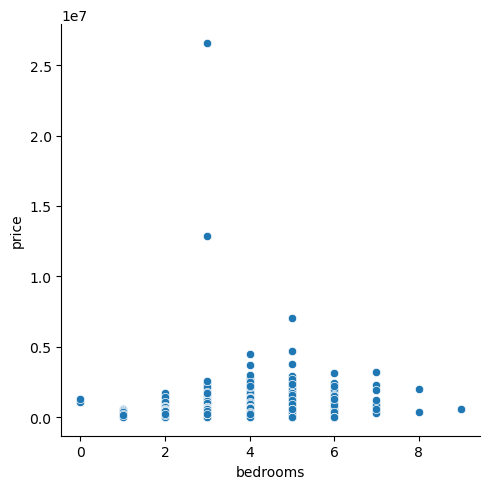

In [48]:
# Relatie tussen variabelen in kaart brengen
# Hebben bepaalde variabelen invloed op de Huisprijs?

sns.relplot(x='bedrooms', y='price', data=data)

(0.0, 13740.0)

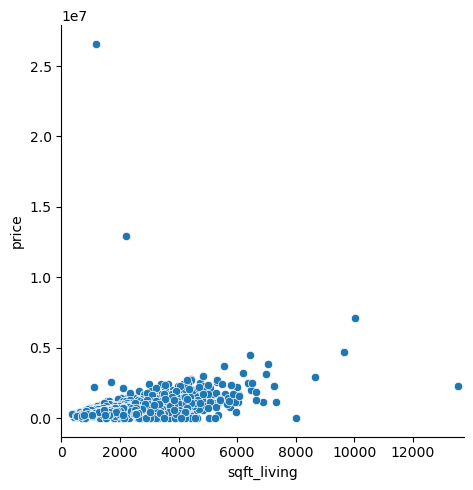

In [49]:
# Hier is wel een duidelijk linear verband (continous)
sns.relplot(x='sqft_living', y='price', data=data)
plt.xlim(0, data['sqft_living'].max()+200)

(0.0, 13740.0)

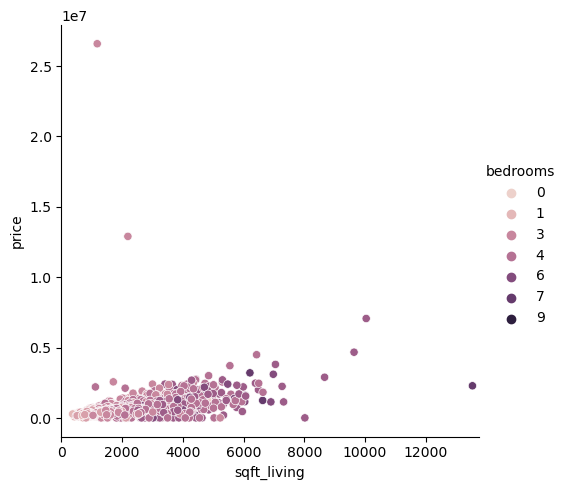

In [50]:
sns.relplot(x='sqft_living', y='price', hue='bedrooms', data=data)
plt.xlim(0, data['sqft_living'].max()+200)

(0.0, 13740.0)

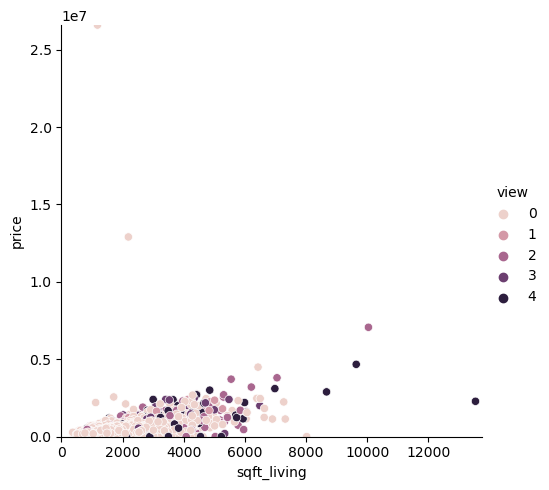

In [51]:
sns.relplot(x='sqft_living', y='price', hue = 'view', data=data)
plt.ylim(0, data['price'].max()+2000)
plt.xlim(0, data['sqft_living'].max()+200)


# De kolommen die mogelijk meegenomen kunnen worden als features zijn:
# bedrooms, bathrooms, sqft_living, floors, view 

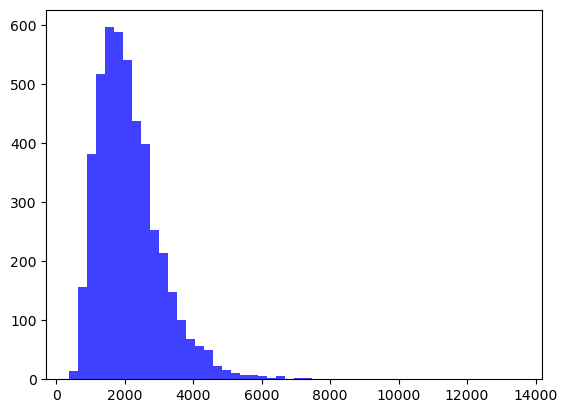

In [117]:
# Showen van de outliers. Zie 6000 op de x-as
plt.hist(data['sqft_living'], 50, facecolor='b', alpha = 0.75)
plt.show()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

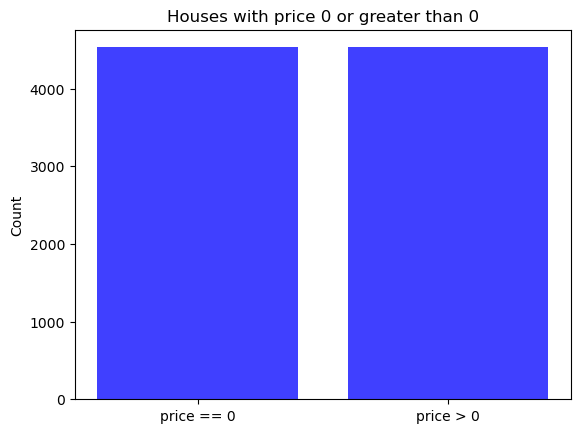

In [85]:
# Showen van de outliers
# Maken bool array of de price 0 is of groter is dan 0
above_0 = np.array(data['price'] > 0, dtype=np.int32)
print(above_0.tolist())
unique, count = np.unique(above_0, return_counts=True)

# map xticks to categories
x_categories = ('price == 0', 'price > 0')
y_pos = np.arange(len(x_categories))

plt.bar(y_pos, count, align='center', facecolor='b', alpha=0.75)
plt.xticks(y_pos, x_categories)
plt.ylabel('Count')
plt.title('Houses with price 0 or greater than 0')

plt.show()

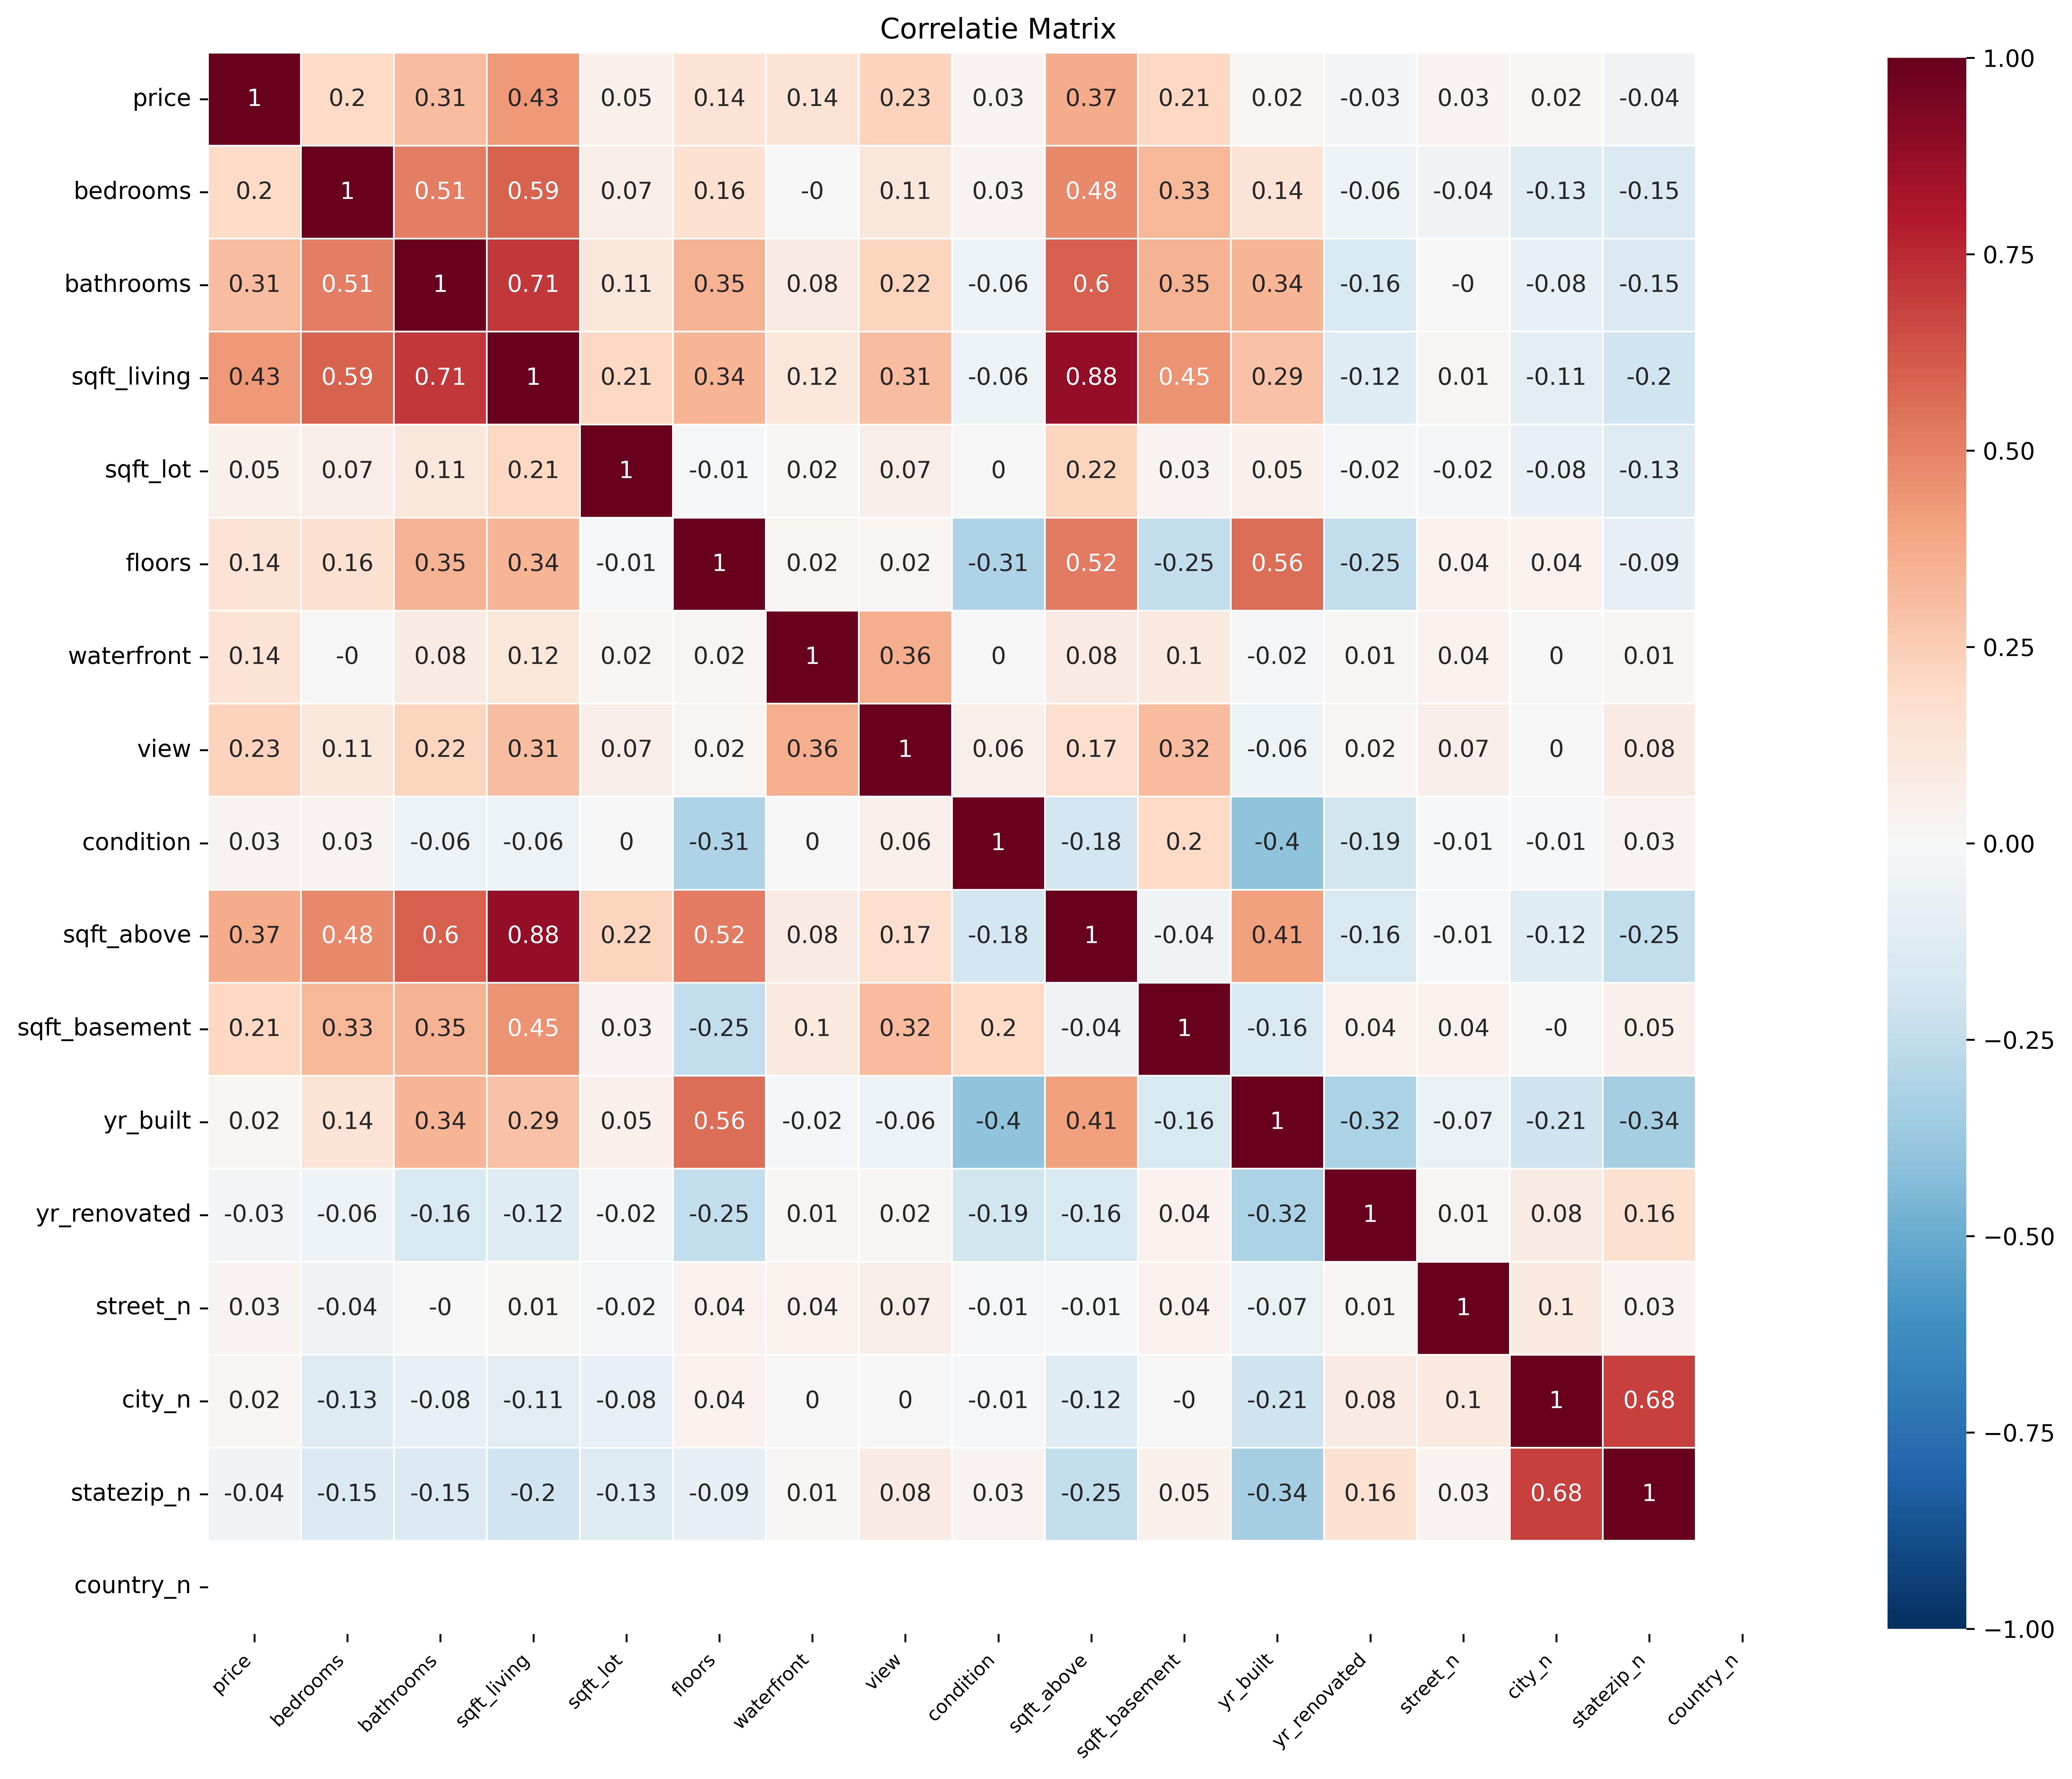

In [118]:
# hier is de correlation matrix getoond
# bron correlatie matrix: https://python.plainenglish.io/how-to-expand-your-correlation-matrix-plot-options-in-python-12eedb188a3c

corr_matrix = data.corr(method="pearson").round(2)
plt.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(corr_matrix, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlatie Matrix')

plt.show()

## 2. Data Cleaning

In deze stap gaan we de data opschonen door te achterhalen of er bepaalde redundancies aanwezig zijn die mogelijk het model kunnen verhinderen. Hiervoor zal er gecheckt worden op NULL-waarden, missing values, het vullen van missing values (gemiddelde waarden ter vervanging), geschikte kolommen uitkiezen voor het model en eventueel kolommen verwijderen (drop columns) die geen verschil gaan maken in de analyse. 

In [119]:
# checken hoeveel waarden '0' voorkomen in 'price', zodat dit gedropt kan worden
data['price'].value_counts()

0          49
300000     42
400000     31
           ..
1635000     1
1339000     1
220600      1
Name: price, Length: 1741, dtype: int64

In [120]:
# Droppen van rijen waar de waarden '0' die in kolom 'price' voorkomen
# Rijen worden inderdaad verminderd
data_price_filter_lower = data['price'] == 0
print(data.shape)
data = data.drop(data[data_price_filter].index)
data.shape

(4600, 22)


(4551, 22)

In [121]:
# de rijen waar waarden '0' voorkwam, zijn er nu inderdaad niet meer
data[data_price_filter]

/tmp/ipykernel_11978/946190876.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data_price_filter]


Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country, street_n, city_n, statezip_n, country_n]
Index: []

[0 rows x 22 columns]

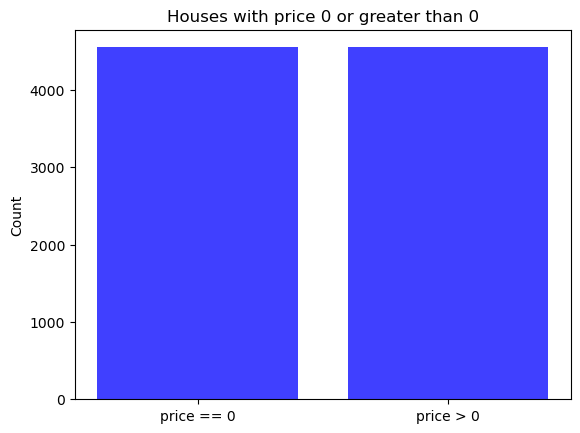

In [122]:
above_0 = np.array(data['price'] > 0, dtype=np.int32)

unique, count = np.unique(above_0, return_counts=True)

# map xticks to categories
x_categories = ('price == 0', 'price > 0')
y_pos = np.arange(len(x_categories))

plt.bar(y_pos, count, align='center', facecolor='b', alpha=0.75)
plt.xticks(y_pos, x_categories)
plt.ylabel('Count')
plt.title('Houses with price 0 or greater than 0')

plt.show()

De waarden '0' zijn wel gedropt. Helaas komt de BARchart er niet goed uit. Ook de histograam geeft nog aan dat de waarden '0' erin voorkomen. 

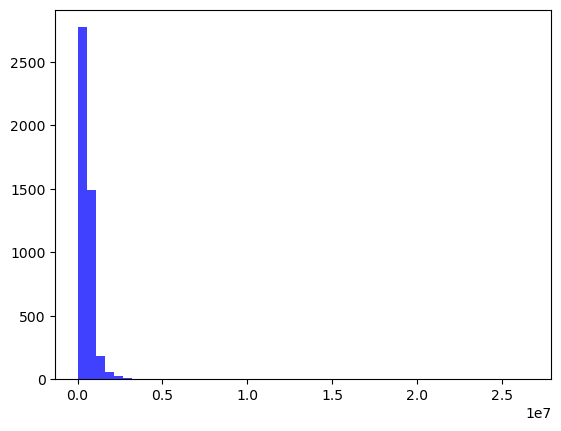

In [147]:
plt.hist(data['price'], 50, facecolor='b', alpha = 0.75)
plt.show()

In [152]:
# dit zijn alle huizen die een prijswaarde hebben van boven de 1.000.000
data_price_filter_upper = data['price'] > 1000000
data[data_price_filter_upper]

date    price  bedrooms  bathrooms  sqft_living  \
1     2014-05-02 00:00:00  2384000         5          2         3650   
11    2014-05-02 00:00:00  1400000         4          2         2920   
14    2014-05-02 00:00:00  1200000         5          3         2910   
...                   ...      ...       ...        ...          ...   
4467  2014-06-06 00:00:00  1337044         4          4         4280   
4494  2014-06-15 00:00:00  1036200         4          3         2500   
4572  2014-07-02 00:00:00  1288333         6          4         3830   

      sqft_lot  floors  waterfront  view  condition  ...  yr_built  \
1         9050       2           0     4          5  ...      1921   
11        4000       1           0     0          5  ...      1909   
14        9480       1           0     0          3  ...      1939   
...        ...     ...         ...   ...        ...  ...       ...   
4467      9583       2           0     0          3  ...      2005   
4494      5801       1           0     0          3  ...      1926   
4572      4800       3           0     0          3  ...      1919   

      yr_renovated                 street      city  statezip country  \
1                0        709 W Blaine St   Seattle  WA 98119     USA   
11            1988  3838-4098 44th Ave NE   Seattle  WA 98105     USA   
14            1969       3534 46th Ave NE   Seattle  WA 98105     USA   
...            ...                    ...       ...       ...     ...   
4467             0      1415 108th Ave SE  Bellevue  WA 98004     USA   
4494          2003     1502 Parkside Dr E   Seattle  WA 98112     USA   
4572          2004         2425 3rd Ave W   Seattle  WA 98119     USA   

     street_n city_n  statezip_n  country_n  
1        3899     35          58          0  
11       3025     35          48          0  
14       2905     35          48          0  
...       ...    ...         ...        ...  
4467      832      3           3          0  
4494      993     35          53          0  
4572     2102     35          58          0  

[321 rows x 22 columns]

In [153]:
# droppen van rijen waar de waarde hoger dan 1000.000 
data = data.drop(data[data_price_filter_upper].index)
data

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-05-02 00:00:00  313000         3          2         1340      7912   
2     2014-05-02 00:00:00  342000         3          2         1930     11947   
3     2014-05-02 00:00:00  420000         3          2         2000      8030   
...                   ...     ...       ...        ...          ...       ...   
4597  2014-07-09 00:00:00  416904         3          2         3010      7014   
4598  2014-07-10 00:00:00  203400         4          2         2090      6630   
4599  2014-07-10 00:00:00  220600         3          2         1490      8102   

      floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0          1           0     0          3  ...      1955          2005   
2          1           0     0          4  ...      1966             0   
3          1           0     0          4  ...      1963             0   
...      ...         ...   ...        ...  ...       ...           ...   
4597       2           0     0          3  ...      2009             0   
4598       1           0     0          3  ...      1974             0   
4599       2           0     0          4  ...      1990             0   

                        street       city  statezip country street_n city_n  \
0         18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
2     26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3              857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
...                        ...        ...       ...     ...      ...    ...   
4597          759 Ilwaco Pl NE     Renton  WA 98059     USA     4033     32   
4598         5148 S Creston St    Seattle  WA 98178     USA     3498     35   
4599         18717 SE 258th St  Covington  WA 98042     USA     1514      9   

      statezip_n  country_n  
0             62          0  
2             26          0  
3              7          0  
...          ...        ...  
4597          37          0  
4598          71          0  
4599          26          0  

[4211 rows x 22 columns]

In [154]:
sqft_living_filter = data['sqft_living'] > 6000
data[sqft_living_filter]
data.shape

(4211, 22)

In [155]:
# droppen van rijen die groter dan 6000 zijn. Dit zijn outliers die de voorspelling beïnvloeden
data = data.drop(data[sqft_living_filter].index)
data

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-05-02 00:00:00  313000         3          2         1340      7912   
2     2014-05-02 00:00:00  342000         3          2         1930     11947   
3     2014-05-02 00:00:00  420000         3          2         2000      8030   
...                   ...     ...       ...        ...          ...       ...   
4597  2014-07-09 00:00:00  416904         3          2         3010      7014   
4598  2014-07-10 00:00:00  203400         4          2         2090      6630   
4599  2014-07-10 00:00:00  220600         3          2         1490      8102   

      floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0          1           0     0          3  ...      1955          2005   
2          1           0     0          4  ...      1966             0   
3          1           0     0          4  ...      1963             0   
...      ...         ...   ...        ...  ...       ...           ...   
4597       2           0     0          3  ...      2009             0   
4598       1           0     0          3  ...      1974             0   
4599       2           0     0          4  ...      1990             0   

                        street       city  statezip country street_n city_n  \
0         18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
2     26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3              857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
...                        ...        ...       ...     ...      ...    ...   
4597          759 Ilwaco Pl NE     Renton  WA 98059     USA     4033     32   
4598         5148 S Creston St    Seattle  WA 98178     USA     3498     35   
4599         18717 SE 258th St  Covington  WA 98042     USA     1514      9   

      statezip_n  country_n  
0             62          0  
2             26          0  
3              7          0  
...          ...        ...  
4597          37          0  
4598          71          0  
4599          26          0  

[4211 rows x 22 columns]

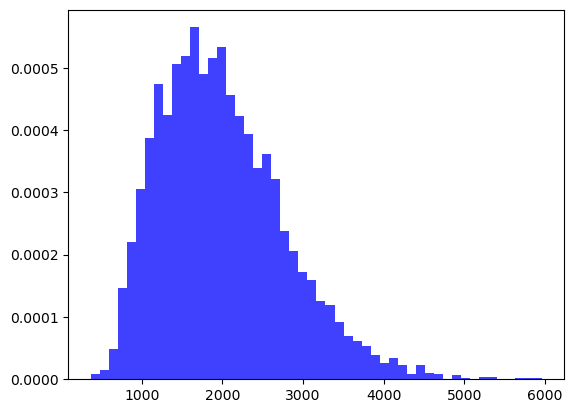

In [156]:
# De outliers na 6000 zijn inderdaad verwijderd. Kijk na 6000 op de X-as
plt.hist(data['sqft_living'], 50, density=True, facecolor='b', alpha = 0.75)
plt.show()

In [63]:
# beetje verwarrend, maar rijen zijn gedropt en pakt waarden van eerstvolgende rij 
data.iloc[122]

date          2014-05-05 00:00:00
price                      309950
bedrooms                        3
                     ...         
city_n                         32
statezip_n                     33
country_n                       0
Name: 123, Length: 22, dtype: object

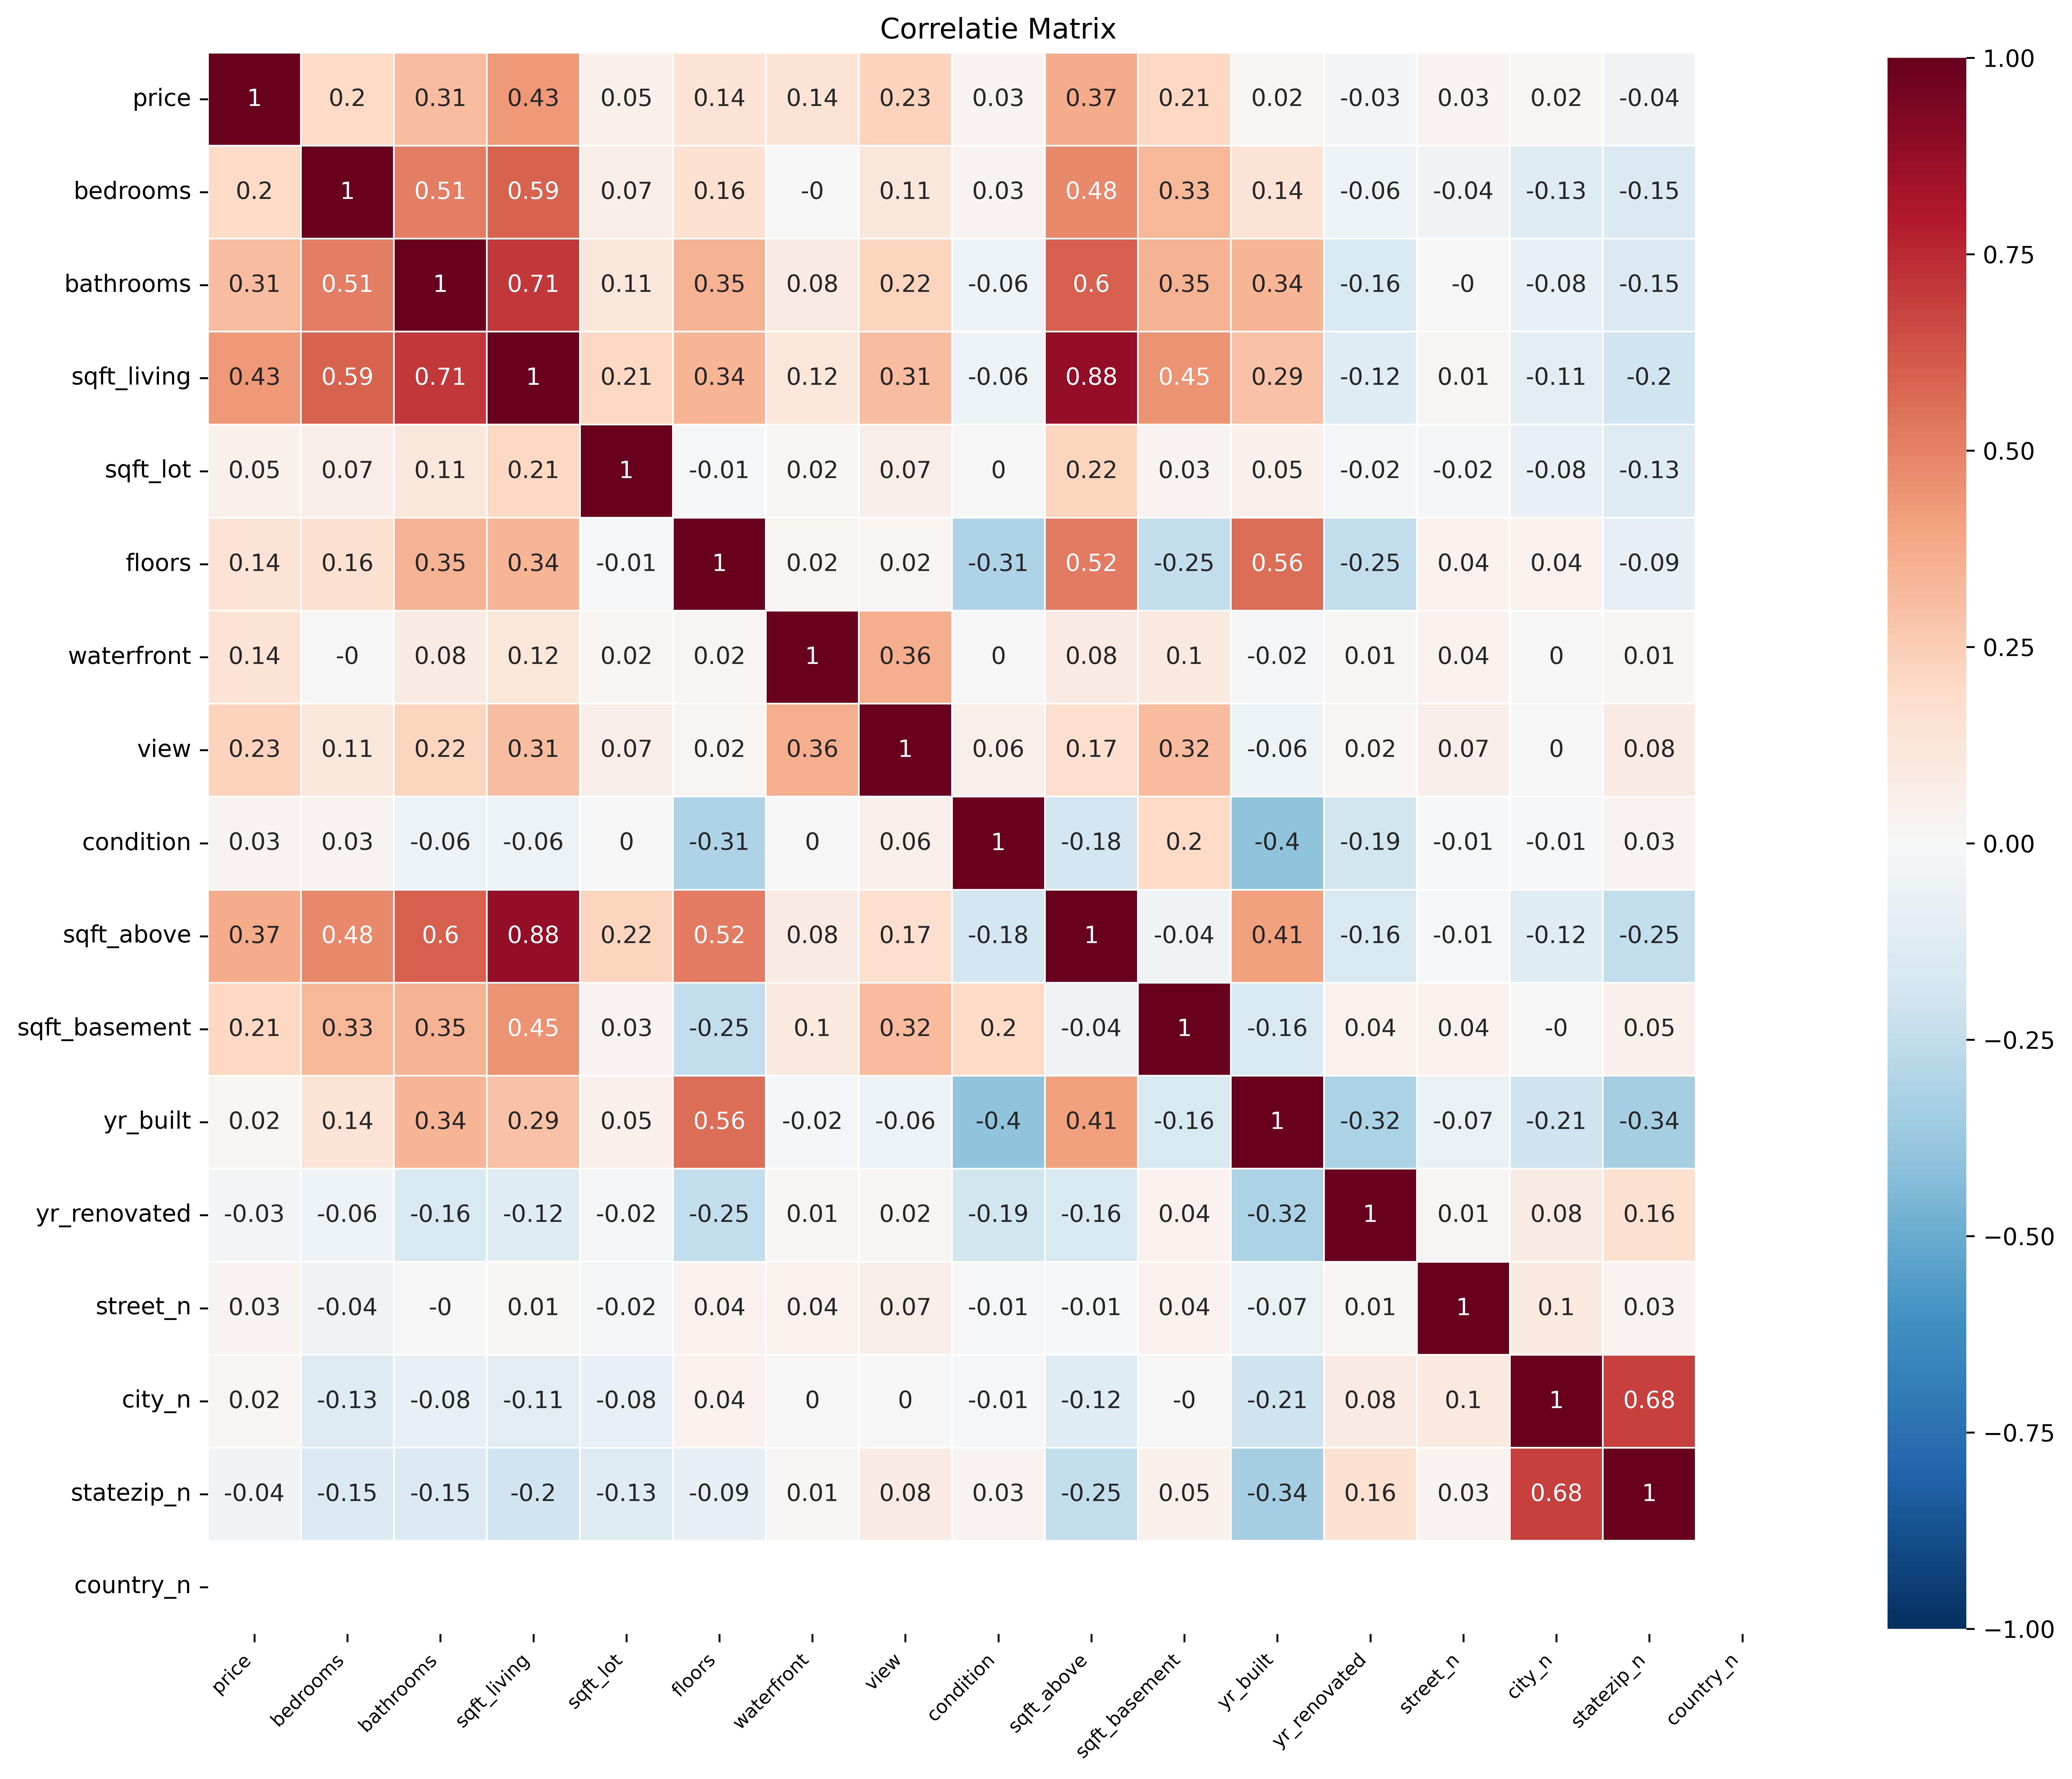

In [157]:
# correlaties na het droppen en cleanen
# bedroom, bathrooms, sqft_living, view, sqft_above, sqft_basement
plt.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(corr_matrix, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlatie Matrix')

plt.show()

In [158]:
# kolommen meenemen die in features zullen behoren
# dit zijn kolommen die hoogste correlatie hebben met price.
features_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_basement', 'street_n', 'city_n', 'statezip_n']

In [159]:
features = data.loc[:, features_cols]
features

bedrooms  bathrooms  sqft_living  view  sqft_above  sqft_basement  \
0            3          2         1340     0        1340              0   
2            3          2         1930     0        1930              0   
3            3          2         2000     0        1000           1000   
...        ...        ...          ...   ...         ...            ...   
4597         3          2         3010     0        3010              0   
4598         4          2         2090     0        1070           1020   
4599         3          2         1490     0        1490              0   

      street_n  city_n  statezip_n  
0         1522      36          62  
2         2291      18          26  
3         4263       3           7  
...        ...     ...         ...  
4597      4033      32          37  
4598      3498      35          71  
4599      1514       9          26  

[4211 rows x 9 columns]

In [160]:
target = data['price']

Het wijzigen van de data types van kolommen bedrooms en bathrooms (afronden naar boven). prijzen 0 uit kolom price droppen.

## 3. Selecteren van een passend model

In deze stap zal een geschikt model gekozen worden voor dit regression probleem. In dit geval zal een Linear regrssion model gebruikt worden voor het voorspellen van huisprijzen. Dit is een model dat als basis gebruikt kan worden en ook simpel is in te zetten (aangezien ik voor het eerst met machine learning modellen werk). 

In [161]:
# Importeren van Linear Regression model
# Importeren van train_test_split voor splitten van data in train en test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [162]:
data.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000         3          2         1340      7912   
2  2014-05-02 00:00:00  342000         3          2         1930     11947   
3  2014-05-02 00:00:00  420000         3          2         2000      8030   
4  2014-05-02 00:00:00  550000         4          2         1940     10500   
5  2014-05-02 00:00:00  490000         2          1          880      6380   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0       1           0     0          3  ...      1955          2005   
2       1           0     0          4  ...      1966             0   
3       1           0     0          4  ...      1963             0   
4       1           0     0          4  ...      1976          1992   
5       1           0     0          3  ...      1938          1994   

                     street       city  statezip country street_n city_n  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3           857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
4         9105 170th Ave NE    Redmond  WA 98052     USA     4352     31   
5            522 NE 88th St    Seattle  WA 98115     USA     3521     35   

   statezip_n  country_n  
0          62          0  
2          26          0  
3           7          0  
4          31          0  
5          54          0  

[5 rows x 22 columns]

In [163]:
# Droppen van onnodige en verhinderende features voor de trainingsset
# Ik voorspel alleen de prijs, dus in de test set neem ik alleen price (doelvariabele) mee
# 'date', 'price', 'street', 'city', 'statezip', 'country', 'yr_built', 'yr_renovated', 'condition', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'bathrooms', 'sqft_living', 'floors', 'view'

X = features
y = target

In [164]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [165]:
# Splitten/scheiden van de data in een trainingset en een testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [166]:
# Oproepen van de Linear Regression model
linreg = LinearRegression()

In [167]:
# Fitten van de Regression model op de trainingsdata
linreg.fit(X_train, y_train)

LinearRegression()

In [168]:
predictions = linreg.predict(X_test)

In [169]:
predictions

array([307356.23848004, 691385.53688452, 340045.83314809, ...,
       497142.93675797, 345767.60511703, 333231.17877341])

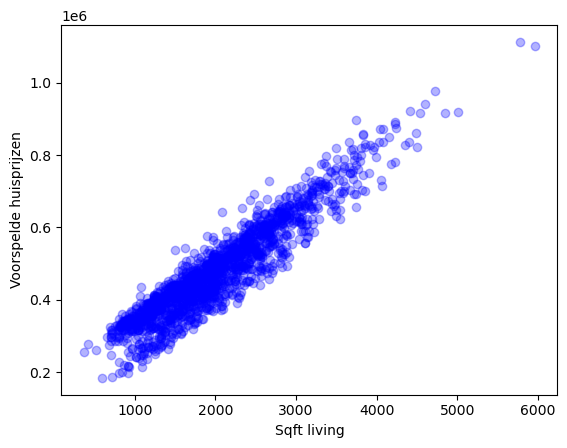

In [175]:
# voorspelling op basis van alles. Maar deze visualisatie is gebaseerd op sqft_living
plt.scatter(X_test['sqft_living'], predictions, color="blue", alpha = 0.3)
plt.xlabel('Sqft living')
plt.ylabel('Voorspelde huisprijzen')
plt.show()

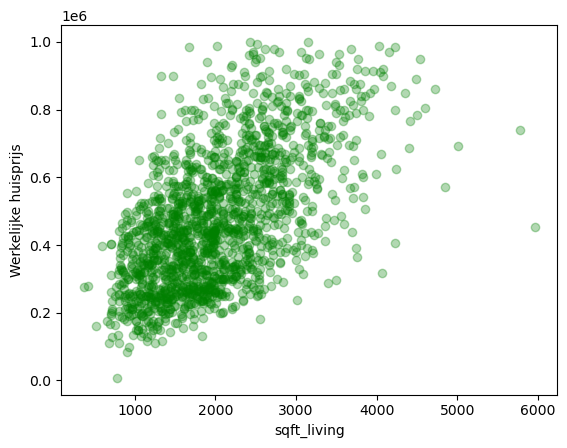

In [179]:
# Visualisatie van originele werkelijke waarden
plt.scatter(X_test['sqft_living'], y_test, color="green", alpha = 0.3)
plt.xlabel('sqft_living')
plt.ylabel('Werkelijke huisprijs')
plt.show()

## 4. Evalueren van het model

In deze stap zal ik het model evalueren om te kijken hoe goed het model presteert. Hiervoor zal ik de accuracy checken en de cross_val_score.

In [180]:
# Efficientie van het model
linreg.score(X_test, y_test)

0.4125251257749557

In [181]:
#cross vall score
from sklearn.model_selection import cross_val_score
print(cross_val_score(linreg, X, y, cv=10, scoring="r2"))

[0.42517531 0.46707499 0.4080868  0.4121322  0.39710068 0.48534335
 0.46726048 0.47946488 0.4331655  0.2317123 ]
